# Weather Prediction Project

## Introduction

Perhaps no other career receives more scrutiny than that of a meteorologist. Obviously, attempting to gauge what the weather will be like in the upcoming week is an extremely difficult task. Unfortunately, we humans take this information as gospel to in order to make plans, host events, and more. When the prediction of the weather is wrong, we lay all of the blame at the feet of the weatherman.

For this project, we will play the role of a meteorologist, but instead of using doppler radar for our predictions, we instead will use Machine Learning! Specifically, our goal is to predict the tomorrow's temperature based upon historical data.

### Data Harvesting

We first download historical weather data from the National Oceanic and Atmospheric Administration (NOAA) website, a site dedicated to tracking weahter all across the United States.

In [1]:
# We first import our packages that we will need throughout this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [2]:
# Our data will be from 1/1/1970 - 11/19/2022 and be sourced from O'Hare airport in Chicago
weather = pd.read_csv("Weather.csv", index_col="DATE")

### Data Cleaning

In [3]:
# Before we start performing analysis, let's get an idea of what our dataset looks like
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",100.0,100.0,NaN,NaN,2148.0,0.02,NaN,0.2,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",80.0,90.0,NaN,NaN,2312.0,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",70.0,50.0,NaN,NaN,806.0,0.01,NaN,0.1,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",60.0,80.0,NaN,NaN,1242.0,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",40.0,30.0,NaN,NaN,1536.0,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,NaN,5.59,NaN,NaN,0.25,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,NaN,8.95,NaN,NaN,0.04,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-17,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,NaN,14.32,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first thing we notice right off the bat is that there are A LOT of NaN values. 

In [4]:
# We calculate a null percentage to see which columns are going to be useless
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]  # Divide by total number of rows

In [5]:
# Let's take a look at the distribution
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.506937
ACSH       0.506885
AWND       0.265117
FMTM       0.476186
PGTM       0.262684
PRCP       0.000052
PSUN       0.933785
SNOW       0.009629
SNWD       0.019466
TAVG       0.679281
TMAX       0.000000
TMIN       0.000000
TSUN       0.666649
WDF1       0.544730
WDF2       0.493580
WDF5       0.494875
WDFG       0.516722
WESD       0.657227
WSF1       0.544626
WSF2       0.493580
WSF5       0.494875
WSFG       0.516463
WT01       0.607062
WT02       0.967850
WT03       0.891334
WT04       0.986850
WT05       0.978774
WT06       0.984003
WT07       0.995237
WT08       0.744875
WT09       0.987368
WT10       0.999948
WT11       0.998499
WT13       0.872075
WT14       0.949213
WT15       0.995651
WT16       0.671361
WT17       0.996014
WT18       0.862239
WT19       0.999482
WT21       0.998343
WT22       0.994668
WV03       0.996376
WV20       0.999948
dtype: float64

Wow, lot's of our columns have over 90% of missing values. Let's set our null percentage threshold to be less than 5%

In [6]:
# We filter our columns
valid_columns = weather.columns[null_pct < .05]

In [7]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [8]:
# We'll filter our dataframe to only contain the valid columns
weather = weather[valid_columns].copy()

In [9]:
# We then lower case our column names
weather.columns = weather.columns.str.lower()

In [10]:
# Let's see what our dataset looks like now
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.02,0.2,3.0,29,22
1970-01-02,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,3.0,26,13
1970-01-03,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.01,0.1,3.0,18,7
1970-01-04,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,3.0,26,3
1970-01-05,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,3.0,18,-2


In [11]:
# Let's see which of the remaining columns still have null values
weather.isnull().sum()

station      0
name         0
prcp         1
snow       186
snwd       376
tmax         0
tmin         0
dtype: int64

In [12]:
# We'll use a simple forward fill to replace the Null values remaining
weather = weather.ffill()

In [13]:
weather.isnull().sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

### Preprocessing

Now that our data has been cleaned, we will proceed to preprocess the data. This will entail removing outliers and normalizing our data along with some additional steps

In [14]:
# Let's check our data types
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [15]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14',
       '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19'],
      dtype='object', name='DATE', length=19316)

In [16]:
# Let's convert the index to a datetime object
weather.index = pd.to_datetime(weather.index)

In [17]:
# Lastly, let's check to see how many rows we have for each year in our dataframe
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    323
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

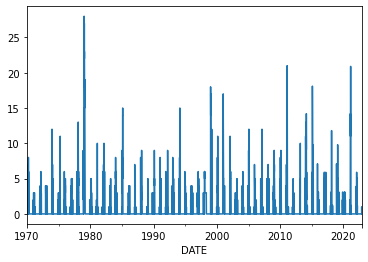

In [18]:
# Let's check our snow data visually
weather['snwd'].plot()

### Model Construction

We now prepare to construct our machine learning models. Recall that the goal of our project is to predict the temperature tomorrow. This seems ripe for some kind of Regression model

In [19]:
# Our target column will be the t-max (temperature max) column
# However, we first will create a new target column that shifts temps back a day as this is inline with our goal
weather['target'] = weather.shift(-1)["tmax"]

In [20]:
# Let's inspect
weather.head(3)

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.02,0.2,3.0,29,22,26.0
1970-01-02,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,3.0,26,13,18.0
1970-01-03,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.01,0.1,3.0,18,7,26.0


In [21]:
# We now have a single NaN value for our last day. Let's use ffill
weather = weather.ffill()

In [22]:
# Let's check for colinearity within our dataset
weather.corr()

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.125332,-0.034990,0.094251,0.149093,0.043207
snow,0.125332,1.000000,0.233767,-0.228861,-0.203576,-0.249132
snwd,-0.034990,0.233767,1.000000,-0.399615,-0.412958,-0.384049
tmax,0.094251,-0.228861,-0.399615,1.000000,0.940573,0.922850
tmin,0.149093,-0.203576,-0.412958,0.940573,1.000000,0.889501
target,0.043207,-0.249132,-0.384049,0.922850,0.889501,1.000000


We notice that some of our variables are highly correlated with one another. As such, we will implement a Ridge regression model.

Recall that Ridge regression penalizes coefficients to account for multi-colinearity

In [23]:
# We create a Ridge model with a regularization parameter of 0.1
rr = Ridge(alpha=.1)

In [24]:
# We then create our list of features
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

We now prepare to use time series cross validation by using backtesting

In [25]:
# We create a function that makes predictions except for the first 10 years
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []  # Contains dataframes that has predictions for 90days
    for i in range(start, weather.shape[0], step):  # We iterate over our dates
        train = weather.iloc[:i, :]  # Train matrix is up to i
        test = weather.iloc[i:(i+step), :]  # Test matrix is from day i to day i +90
        
        model.fit(train[predictors], train["target"])  # We then train our model
        predictions = model.predict(test[predictors])  # We then create our predictions
        
        # We now adjust our numpy array and convert it into a pandas series
        predictions = pd.Series(predictions, index=test.index)
        
        combined = pd.concat([test["target"], predictions], axis=1)  # Our combined dataframe helps us visualize how close our predictions were
        combined.columns = ["actual", "prediction"]
        
        # We then add an additional column to see how close we were
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions, axis=0)  # All predictions converted into one dataframe

### Generating Predictions

My favorite part of any Machine Learning workflow...making predictions!

In [26]:
# We simply call our function that we defined abave
preds = backtest(weather, rr, predictors)

In [27]:
# Let's take a look!
preds

,actual,prediction,diff
DATE,,,
1979-12-30,44.0,46.727655,2.727655
1979-12-31,32.0,44.885270,12.885270
1980-01-01,33.0,36.250140,3.250140
1980-01-02,31.0,37.669578,6.669578
1980-01-03,30.0,34.577278,4.577278
...,...,...,...
2022-11-15,37.0,40.461721,3.461721
2022-11-16,33.0,41.270279,8.270279
2022-11-17,30.0,38.075207,8.075207


In [28]:
# Let's utilize the mean absolute error metric
mean_absolute_error(preds['actual'], preds['prediction'])

6.254463676021407

On average, we were off by 6 degrees. This is not really that great. Let's try to make some improvements.

### Making Improvements

Let's calculate the average temperature in the past 3 days and the past 14 days. This should help accuracy because it should help us deal with outliers that may provide unecessary noise in our data

In [29]:
# We first create a function to calculate percentage differense
def pct_diff(old, new):
    return (new-old)/old

# We then create a function to compute the rolling average
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

In [30]:
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [31]:
# Let's check our adjustments
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.02,0.2,3.0,29,22,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,3.0,26,13,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.01,0.1,3.0,18,7,26.0,24.333333,-0.260274,14.000000,-0.500000,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,3.0,26,3,18.0,23.333333,0.114286,7.666667,-0.608696,3.333333e-03,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,3.0,18,-2,8.0,20.666667,-0.129032,2.666667,-1.750000,3.333333e-03,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.25,1.0,1.0,38,33,37.0,39.333333,-0.033898,29.333333,0.125000,8.333333e-02,2.000000,58.285714,-0.348039,42.000000,-0.214286,0.037857,5.603774
2022-11-16,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.04,0.0,0.0,37,31,33.0,39.000000,-0.051282,30.333333,0.021978,9.666667e-02,-0.586207,55.785714,-0.336748,41.142857,-0.246528,0.040714,-0.017544
2022-11-17,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,0.0,33,29,30.0,36.000000,-0.083333,31.000000,-0.064516,9.666667e-02,-1.000000,52.928571,-0.376518,39.500000,-0.265823,0.040714,-1.000000


In [32]:
# Recall for the beginning, we don't have 14 days previous to 1/1/1970. Let's drop them
weather = weather.iloc[14:, :]

In [33]:
# However, we have some zero divisor null values now.
weather.isnull().sum()

station                   0
name                      0
prcp                      0
snow                      0
snwd                      0
tmax                      0
tmin                      0
target                    0
rolling_3_tmax            0
rolling_3_tmax_pct        0
rolling_3_tmin            0
rolling_3_tmin_pct        1
rolling_3_prcp            0
rolling_3_prcp_pct     4200
rolling_14_tmax           0
rolling_14_tmax_pct       0
rolling_14_tmin           0
rolling_14_tmin_pct       0
rolling_14_prcp           0
rolling_14_prcp_pct      41
dtype: int64

In [34]:
# Let's fill those values with 0. However, there are some infinite values as well. We treat those as NaN before ffilling again
pd.set_option('mode.use_inf_as_na', True)
weather = weather.fillna(0)

In [35]:
# Let's now write one more function that returns a rolling mean of all rows
def expand_mean(df):
    return df.expanding(1).mean()
# We then use a loop that goes through our data, groups all of the months together, and goes one by one and finds the mean of all of the dates before that date
for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [36]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,7.0,37,19,37.0,28.333333,0.305882,...,4.357143,3.360656,0.016429,-1.000000,37.000000,37.000000,19.000000,19.000000,0.000000,0.000000
1970-01-16,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.01,0.1,3.0,37,25,25.0,33.000000,0.121212,...,5.214286,3.794521,0.017143,-0.416667,37.000000,37.000000,22.000000,25.000000,0.005000,0.010000
1970-01-17,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.29,2.5,4.0,25,11,11.0,33.000000,-0.242424,...,5.500000,1.000000,0.037143,6.807692,33.000000,25.000000,18.333333,11.000000,0.100000,0.290000
1970-01-18,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,5.0,11,-2,3.0,24.333333,-0.547945,...,5.142857,-1.388889,0.037143,-1.000000,27.500000,11.000000,13.250000,-2.000000,0.075000,0.000000
1970-01-19,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,5.0,3,-11,1.0,13.000000,-0.769231,...,4.500000,-3.444444,0.037143,-1.000000,22.600000,3.000000,8.400000,-11.000000,0.060000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.25,1.0,1.0,38,33,37.0,39.333333,-0.033898,...,42.000000,-0.214286,0.037857,5.603774,48.299683,47.584906,32.492698,32.905660,0.089346,0.068491
2022-11-16,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.04,0.0,0.0,37,31,33.0,39.000000,-0.051282,...,41.142857,-0.246528,0.040714,-0.017544,48.292513,46.849057,32.491751,31.660377,0.089315,0.036981
2022-11-17,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,0.0,0.0,33,29,30.0,36.000000,-0.083333,...,39.500000,-0.265823,0.040714,-1.000000,48.282815,48.547170,32.489537,31.792453,0.089258,0.058868


### Generating Predictions Part 2

In [37]:
# We now use our new feature matrix to make predictions
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [38]:
preds = backtest(weather, rr, predictors)

In [39]:
# Let's go ahead and check our error metric on this new set of predictions
mean_absolute_error(preds['actual'], preds['prediction'])

5.805120242142583

We saw about a half of a degree improvement after we incorporated the above changes.

### Diagnostics

A good question to ask is are there some days that are overweighting our error metrics? Meaning, are there some days where are actual and predicted values are extremely different?

In [40]:
preds.sort_values('diff', ascending=False)

,actual,prediction,diff
DATE,,,
1983-12-24,-5.0,-52.100885,47.100885
2017-03-23,82.0,46.784904,35.215096
1992-02-29,71.0,38.796760,32.203240
1981-03-30,87.0,54.830270,32.169730
2003-03-31,81.0,50.522031,30.477969
...,...,...,...
1990-05-13,66.0,65.998955,0.001045
1991-07-09,84.0,84.000882,0.000882
1995-03-31,46.0,46.000672,0.000672


For the first few rows, it looks like our model is predicting tempreatures to be well below what they actually were on those days.

<AxesSubplot:>

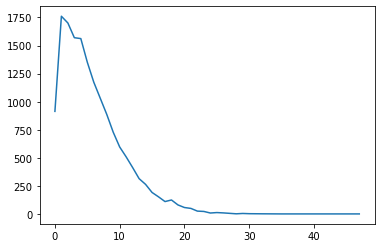

In [41]:
# Let's plot these diff values as a histrogram
preds["diff"].round().value_counts().sort_index().plot()

## Conclusion

It appears that our model is pretty accurate save for a few days where our predictions are way off. This seems to be really skewing our error metric.